# Precipitação exercícios
***

## <font color=steelblue>Exercício - Curva Dupla Massa</font>

<font color=steelblue>Realizaremos uma análise de curva dupla massa com os dados da planilha *Exercise_003* do arquivo *RainfallData.xlsx*.</font>

In [2]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context('notebook')

from scipy.optimize import curve_fit

### Importando os dados

In [3]:
# Importar os dados
data3 = pd.read_excel('../data/RainfallData.xlsx', sheet_name='Exercise_003',
                      skiprows=0, index_col=0)

# nome das estacoes
gages = data3.columns

# calculando as médias das estações para cada ano
data3['AVG'] = data3.mean(axis=1)

data3.head()

,A,B,C,D,E,AVG
Year,,,,,,
1926,39.75,45.70,30.69,37.36,32.85,37.270
1927,39.57,38.52,40.99,30.87,28.08,35.606
1928,42.01,48.26,40.44,42.00,33.51,41.244
1929,41.39,34.64,32.49,39.92,29.58,35.604
1930,31.55,45.13,36.72,36.32,23.76,34.696


### Curva dupla massa
Vamos traçar simultaneamente a curva de dupla massa para todas as estações, para que possamos começar a identificar as estações que podem ter problemas.

Para plotar vários gráficos na mesma figura, usaremos a função `subplots` do `Matplotlib`.

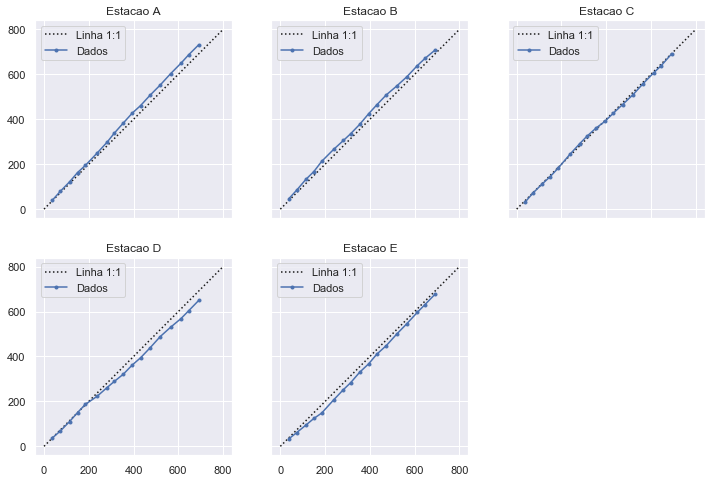

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8), sharex=True, sharey=True)

for (gage, ax) in zip(gages, axes.flatten()):
    # linha de inclinação  1
    ax.plot((0, 800), (0, 800), ':k', label='Linha 1:1')
    # curva dupla massa
    ax.plot(data3.AVG.cumsum(), data3[gage].cumsum(), '.-', label='Dados')
    ax.set_title('Estacao ' + gage)
    ax.legend()
    
axes[1, 2].axis('off');

A partir do gráfico, temos certeza de que a série na estação C está correta, mas pode haver problemas no restante das estações.

### Identificando os erros
A curva de dupla massa deve representar uma regressão linear sem interceptação. Criaremos uma função representando essa regressão linear que usaremos nas etapas a seguir.

In [6]:
def linear_reg(x, m):
    """Linear regression with no intecept
    
    y = m * x   
    
    Input:
    ------
    x:         float. Independet value
    m:         float. Slope of the linear regression
    
    Output:
    -------
    y:         float. Regressed value"""
    
    y = m * x
    
    return y

#### Estação A
Para identificar erros, teremos que ajustar a regressão linear sem intercepto para ambas as séries antes e depois de um determinado ano; se a diferença na inclinação ajustada para essas duas séries exceder um limite de erro, identificamos esse ano como um ponto de quebra na curva de dupla massa. Iremos iterar esse processo para cada ano e definir um limite de erro (ou tolerância) para encontrar todos os possíveis pontos de interrupção na série.

In [7]:
# definindo a estação
gage = 'A'

In [9]:
# definindo a tolerância do erro
error = .2

In [10]:
for year in data3.index[3:-3]:
    # ajustar a regressão para antes do ano em questão
    m1 = curve_fit(linear_reg, data3.loc[:year, 'AVG'].cumsum(), data3.loc[:year, gage].cumsum())[0][0]
    # ajustar a regressão para depois do ano em questão
    m2 = curve_fit(linear_reg, data3.loc[year:, 'AVG'].cumsum(), data3.loc[year:, gage].cumsum())[0][0]
    # fator de correção
    
    if abs(m1 - m2) > error:
        print('{0}   m1 = {1:.3f}   m2 = {2:.3f}   factor = {3:.3f}'.format(year, m1, m2, factor))

Não há erros na série da estação A. 

#### Todas as estações
Simplesmente alterando o nome da estação na seção anterior, podemos repetir o processo. Vamos criar uma função e executá-la em um loop.

In [11]:
def identify_errors(dataGage, dataAVG, error=.1):
    """Identificando possíveis pontos de quebra na curva de massa dupla
    
    Parametros:
    -----------
    dataGage:  series. Série anual para a estação a ser verificada
    dataAVG:   series. Série anual da média entre as estações em uma região
    error:     float. Erro threshold
    
    Saída:
    -------
    Imprimirá os anos com uma diferença de inclinação superior ao 'erro', 
    juntamente com os valores das inclinações.
    """
    
    for year in dataGage.index[3:-3]:
        # ajustar a regressão para antes do ano em questão
        m1 = curve_fit(linear_reg, dataAVG.loc[:year].cumsum(), dataGage.loc[:year].cumsum())[0][0]
        # ajustar a regressão para depois do ano em questão
        m2 = curve_fit(linear_reg, dataAVG.loc[year:].cumsum(), dataGage.loc[year:].cumsum())[0][0]
        ## Fator de correção
        if abs(m1 - m2) > error:
            print('{0}   m1 = {1:.3f}   m2 = {2:.3f}'.format(year, m1, m2))

In [20]:
for gage in gages:
    print('Estacao ', gage)
    identify_errors(data3['AVG'], data3[gage], error=.1)
    print ()

('Estacao ', u'A')
()
('Estacao ', u'B')
1929   m1 = 0.878   m2 = 0.981
1930   m1 = 0.874   m2 = 0.978
1931   m1 = 0.883   m2 = 1.006
1932   m1 = 0.897   m2 = 1.007
1936   m1 = 0.922   m2 = 1.028
1937   m1 = 0.924   m2 = 1.054
1938   m1 = 0.929   m2 = 1.084
1939   m1 = 0.935   m2 = 1.051
()
('Estacao ', u'C')
()
('Estacao ', u'D')
1930   m1 = 1.004   m2 = 1.107
()
('Estacao ', u'E')
1929   m1 = 1.203   m2 = 1.002
1930   m1 = 1.223   m2 = 0.986
1931   m1 = 1.191   m2 = 0.954
1932   m1 = 1.161   m2 = 0.962
1933   m1 = 1.143   m2 = 0.963
1934   m1 = 1.122   m2 = 0.954
1935   m1 = 1.108   m2 = 0.971
1936   m1 = 1.093   m2 = 0.954
1937   m1 = 1.085   m2 = 0.978
1938   m1 = 1.075   m2 = 0.945
1939   m1 = 1.066   m2 = 0.962
()


Identificamos erros nas estações B, D e E. Esta foi uma busca automática para descartar as estações corretas. Agora, temos que analisar uma a uma essas três estações que podem ter erros.

### Corrigindo erros
#### Estação B
##### Análise das séries
Identificamos anomalias nos anos entre 1929 e 1939. Isso provavelmente significará que existem dois pontos de quebra na curva de dupla massa. Vejamos a curva de dupla massa e os pontos específicos que representam esses dois anos.

In [21]:
# definindo a estação e anos correspondentes à quebras na linha
gage = 'B'
breaks = [1929, 1939]

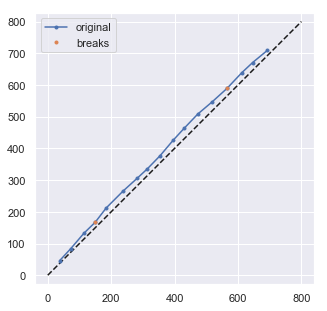

In [22]:
# visualizando
plt.figure(figsize=(5, 5))
plt.axis('equal')
plt.plot((0, 800), (0, 800), '--k')
plt.plot(data3.AVG.cumsum(), data3[gage].cumsum(), '.-', label='original')
plt.plot(data3.AVG.cumsum().loc[breaks], data3[gage].cumsum().loc[breaks], '.', label='breaks')
plt.legend();

De relance, podemos identificar três períodos. Há um período no início da série com uma inclinação maior que a usual; esse período parece estender-se tanto até 1930 (não 1929 como havíamos identificado). Há um período no final da série com inclinação menor que a usual; esse período parece começar em 1938 (não em 1939 como havíamos identificado).

Vamos redefinir os pontos de interrupção e calcular a inclinação da regressão para verificá-la.

In [23]:
# redefinindo os break points
breaks = [1930, 1938]

In [24]:
# ajuste da regressão até o primeiro intervalo
m1 = curve_fit(linear_reg, data3.loc[:breaks[0], 'AVG'].cumsum(), data3.loc[:breaks[0], gage].cumsum())[0][0]
# ajustar a regressão da primeira para a segunda quebra
m2 = curve_fit(linear_reg, data3.loc[breaks[0]:breaks[1], 'AVG'].cumsum(), data3.loc[breaks[0]:breaks[1], gage].cumsum())[0][0]
# ajustar a regressão a partir da terceira quebra
m3 = curve_fit(linear_reg, data3.loc[breaks[1]:, 'AVG'].cumsum(), data3.loc[breaks[1]:, gage].cumsum())[0][0]

print('m1 = {0:.3f}   m2 = {1:.3f}   m3 = {2:.3f}'.format(m1, m2, m3))

m1 = 1.144   m2 = 1.045   m3 = 0.922


Como esperado, existem três inclinações diferentes na série. Vamos supor que o dado correto é aquele de 1930 a 1937, pois é o período mais longo dos três e sua inclinação é mais próxima de 1. Portanto, temos que calcular os fatores de correção para dois períodos: antes de 1930 e depois de 1937; com esses fatores podemos corrigir a série.

##### Corrigindo as séries

In [25]:
# fatores de correção
factor12 = m2 / m1
factor23 = m2 / m3

factor12, factor23

(0.9129617218111449, 1.133101596550879)

In [28]:
# cópia da série original
data3['B_'] = data3[gage].copy()
# corrigindo o primeiro intervalo
data3.loc[:breaks[0], 'B_'] *= factor12
# corrigindo o terceiro intervalo
data3.loc[breaks[1]:, 'B_'] *= factor23

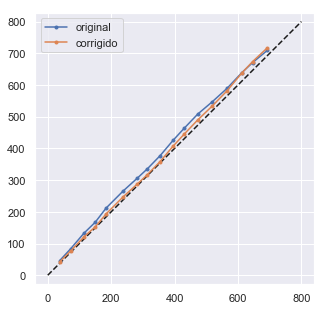

In [29]:
plt.figure(figsize=(5, 5))
plt.axis('equal')
plt.plot((0, 800), (0, 800), '--k')
plt.plot(data3.AVG.cumsum(), data3[gage].cumsum(), '.-', label='original')
plt.plot(data3.AVG.cumsum(), data3['B_'].cumsum(), '.-', label='corrigido')
plt.legend();

Agora podemos verificar novamente os erros na série corrigida.

In [30]:
# verifique novamente se há erros
identify_errors(data3.B_, data3.AVG)

Não há mais erros, então corrigimos os dados da estação B.

#### Estação D
##### Análise da série
Encontramos um ponto de ruptura no ano de 1930.

In [31]:
# definindo a estação e ano correspondente à quebra na linha
gage = 'D'
breaks = [1930]

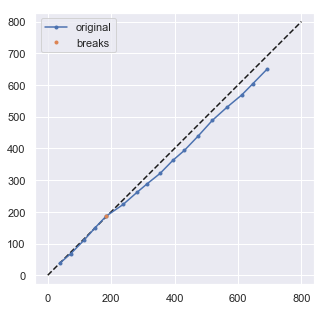

In [32]:
# visualisando
plt.figure(figsize=(5, 5))
plt.axis('equal')
plt.plot((0, 800), (0, 800), '--k')
plt.plot(data3.AVG.cumsum(), data3[gage].cumsum(), '.-', label='original')
plt.plot(data3.AVG.cumsum().loc[breaks], data3[gage].cumsum().loc[breaks], '.', label='breaks')
plt.legend();

In [33]:
# ajuste a regressão até a quebra
m1 = curve_fit(linear_reg, data3.loc[:breaks[0], 'AVG'].cumsum(), data3.loc[:breaks[0], gage].cumsum())[0][0]
# ajuste a regressão depois da quebra
m2 = curve_fit(linear_reg, data3.loc[breaks[0]:, 'AVG'].cumsum(), data3.loc[breaks[0]:, gage].cumsum())[0][0]

print('m1 = {0:.3f}   m2 = {1:.3f}'.format(m1, m2))

m1 = 0.996   m2 = 0.903


Este caso é mais simples que o anterior e facilmente identificamos o ponto de ruptura em 1930. O período anterior a 1930 tem uma inclinação mais próxima de 1, então vamos supor que esta é a parte correta da série.

##### Corrigindo a série

In [34]:
# Fator de correção
factor = m1 / m2

factor

1.1026631111918022

In [35]:
# cópia da série original
data3[gage + '_'] = data3[gage].copy()
# corrigindo o período após a quebra
data3.loc[breaks[0]:, gage + '_'] *= factor

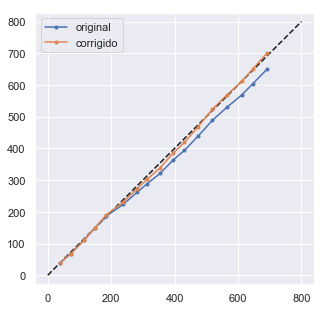

In [36]:
plt.figure(figsize=(5, 5))
plt.axis('equal')
plt.plot((0, 800), (0, 800), '--k')
plt.plot(data3.AVG.cumsum(), data3[gage].cumsum(), '.-', label='original')
plt.plot(data3.AVG.cumsum(), data3[gage + '_'].cumsum(), '.-', label='corrigido')
plt.legend();

In [37]:
# verificando erros novamente
identify_errors(data3[gage + '_'], data3.AVG, error=.1)

1935   m1 = 0.971   m2 = 1.075
1937   m1 = 0.975   m2 = 1.087


Identificamos mais dois pontos de quebra possíveis na série corrigida. Ambos podem indicar que a última seção da série tem uma inclinação maior que a inicial. Vamos corrigir a série a partir de 1935, e isso pode resolver o segundo ponto de quebra em 1937.

In [44]:
gage = 'D_'
breaks = [1935]

In [45]:
# ajuste a regressão até a quebra
m1 = curve_fit(linear_reg, data3.loc[:breaks[0], 'AVG'].cumsum(), data3.loc[:breaks[0], gage].cumsum())[0][0]
# ajuste a regressão depois da quebra
m2 = curve_fit(linear_reg, data3.loc[breaks[0]:, 'AVG'].cumsum(), data3.loc[breaks[0]:, gage].cumsum())[0][0]

print('m1 = {0:.3f}   m2 = {1:.3f}'.format(m1, m2))

m1 = 0.971   m2 = 1.075


In [46]:
# Fator de correção
factor = m1 / m2

factor

0.9034952502585142

In [47]:
# cópia da série original
data3[gage + '_'] = data3[gage].copy()
# corrigindo o período após a quebra
data3.loc[breaks[0]:, gage + '_'] *= factor

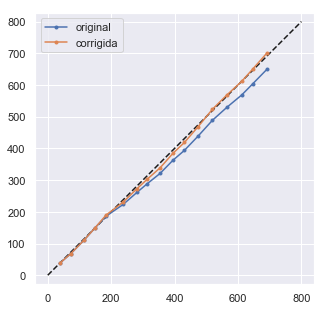

In [42]:
plt.figure(figsize=(5, 5))
plt.axis('equal')
plt.plot((0, 800), (0, 800), '--k')
plt.plot(data3.AVG.cumsum(), data3[gage].cumsum(), '.-', label='original')
plt.plot(data3.AVG.cumsum(), data3[gage + '_'].cumsum(), '.-', label='corrigida')
plt.legend();

In [48]:
# Verificando para novos erros
identify_errors(data3[gage + '_'], data3.AVG, error=.1)

#### Estação E
##### Análise da série
A série da estação E tem comportamento semelhante à série B. Há uma anomalia na série entre 1929 e 1938, indicando que pode haver dois pontos de quebra na curva de dupla massa.

In [49]:
# definir a estação e anos correspondentes às quebras na linha
gage = 'E'
breaks = [1929, 1938]

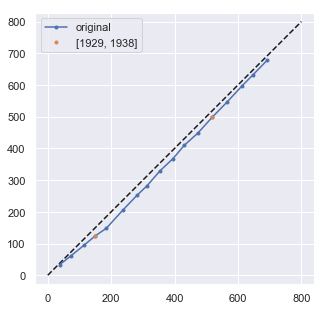

In [50]:
# visualisando
plt.figure(figsize=(5, 5))
plt.axis('equal')
plt.plot((0, 800), (0, 800), '--k')
plt.plot(data3.AVG.cumsum(), data3[gage].cumsum(), '.-', label='original')
plt.plot(data3.AVG.cumsum().loc[breaks], data3[gage].cumsum().loc[breaks], '.', label=breaks)
plt.legend();

In [51]:
# ajuste da regressão até o primeiro intervalo
m1 = curve_fit(linear_reg, data3.loc[:breaks[0], 'AVG'].cumsum(), data3.loc[:breaks[0], gage].cumsum())[0][0]
# ajustar a regressão da primeira para a segunda quebra
m2 = curve_fit(linear_reg, data3.loc[breaks[0]:breaks[1], 'AVG'].cumsum(), data3.loc[breaks[0]:breaks[1], gage].cumsum())[0][0]
# ajustar a regressão a partir do segundo intervalo
m3 = curve_fit(linear_reg, data3.loc[breaks[1]:, 'AVG'].cumsum(), data3.loc[breaks[1]:, gage].cumsum())[0][0]

print('m1 = {0:.3f}   m2 = {1:.3f}   m3 = {2:.3f}'.format(m1, m2, m3))

m1 = 0.831   m2 = 0.980   m3 = 1.058


Parece haver apenas uma quebra na linha entre o primeiro e o segundo período. As inclinações do segundo e terceiro períodos são tão próximas que, muito provavelmente, não há mudança a partir de 1938. Além disso, a quebra na linha parece ser mais forte em 1930 do que em 1929, então vamos alterar as quebras para incluir apenas 1930. Vamos supor que o período a ser corrigido é anterior a 1930.

In [52]:
breaks = [1930]
# ajustar a regressão até a quebra
m1 = curve_fit(linear_reg, data3.loc[:breaks[0], 'AVG'].cumsum(), data3.loc[:breaks[0], gage].cumsum())[0][0]
# ajustar a regressão a partir da quebra
m2 = curve_fit(linear_reg, data3.loc[breaks[0]:, 'AVG'].cumsum(), data3.loc[breaks[0]:, gage].cumsum())[0][0]

m1, m2

(0.8176415003641067, 1.0142506420191348)

##### Corrigindo a série

In [53]:
# Fator de correção
factor = m2 / m1

factor

1.2404588582740426

In [54]:
# copia a série original
data3['E_'] = data3[gage].copy()
# Corrigindo o período anterios a quebra
data3.loc[:breaks[0], 'E_'] *= factor

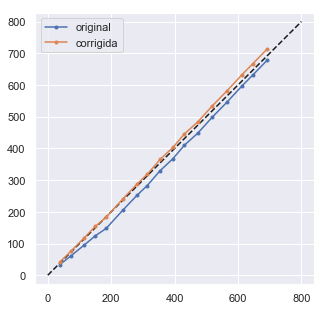

In [55]:
plt.figure(figsize=(5, 5))
plt.axis('equal')
plt.plot((0, 800), (0, 800), '--k')
plt.plot(data3.AVG.cumsum(), data3[gage].cumsum(), '.-', label='original')
plt.plot(data3.AVG.cumsum(), data3[gage + '_'].cumsum(), '.-', label='corrigida')
plt.legend();

In [56]:
# verificando novos erros
identify_errors(data3[gage + '_'], data3.AVG)

Não identificamos mais erros, portanto, a suposição de que as inclinações do segundo e terceiro períodos estavam suficientemente próximas estava correta.

#### Redesenhando as curvas dupla massa

In [58]:
# recalculando as médias
gages = ['A', 'B_', 'C', 'D__', 'E_']
data3['AVG_'] = data3[gages].mean(axis=1)

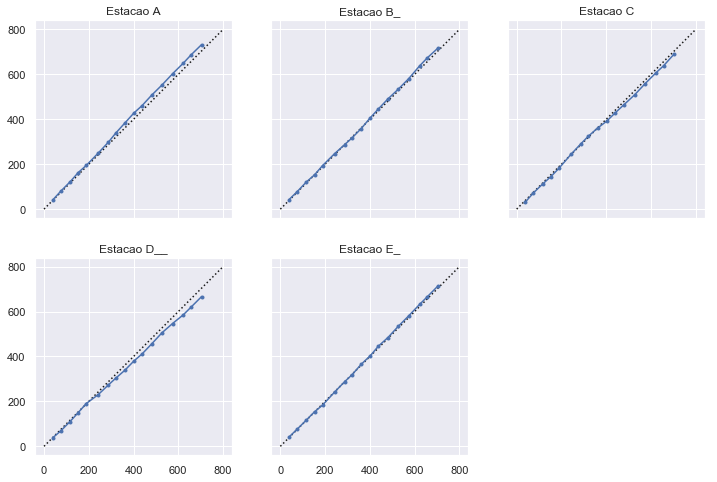

In [59]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8), sharex=True, sharey=True)

for (gage, ax) in zip(gages, axes.flatten()):
    ax.plot((0, 800), (0, 800), ':k')
    # curva dupla massa
    ax.plot(data3.AVG_.cumsum(), data3[gage].cumsum(), '.-', label='corrigida')
    ax.set_title('Estacao ' + gage)
    
axes[1, 2].axis('off');
                
# save figure
plt.savefig('../Ex3_double-mass curve.png', dpi=300)

In [60]:
# exportando as séries corrigidas
data3_ = data3.loc[:, gages]
data3_.columns = ['A', 'B', 'C', 'D', 'E']
data3_.to_csv('../Ex3_corrected series.csv', float_format='%.2f')